# Orbital-scale variability over the last 1.5 Ma

## "Shackleton site" oxygen isotopes 

data from [Hodell et al (2023)](https://doi.org/10.5194/cp-19-607-2023)

### Exploratory data analysis of benthic forams

In [12]:
import pyleoclim as pyleo
from pangaeapy.pandataset import PanDataSet
# load the dataset
dsb = PanDataSet('10.1594/PANGAEA.951382')
print(dsb.title)
print(dsb.data.head())

Oxgyen and carbon isotope data for benthic foraminifera at IODP Site 339-U1385
        Event  Latitude  Longitude           Sample label  Depth sed   
0  339-U1385D   37.5713   -10.1259    339-U1385D-1H-1,1-2       0.02  \
1  339-U1385D   37.5713   -10.1259  339-U1385D-1H-1,20-21       0.21   
2  339-U1385D   37.5713   -10.1259  339-U1385D-1H-1,21-22       0.22   
3  339-U1385D   37.5713   -10.1259  339-U1385D-1H-1,40-41       0.41   
4  339-U1385D   37.5713   -10.1259  339-U1385D-1H-1,41-42       0.42   

   Depth comp  Depth comp r  Depth corr cr   Age  Age_2  ...  Age_4   
0        0.02          0.02           0.02  0.13   0.12  ...   0.14  \
1        0.21          0.21           0.21  1.37   1.22  ...   1.46   
2        0.22          0.22           0.22  1.44   1.28  ...   1.53   
3        0.41          0.41           0.41  2.66   2.39  ...   2.85   
4        0.42          0.42           0.42  2.72   2.44  ...   2.92   

                      Species Cibicidoides spp. δ18O  Cibicid

In [13]:
dsb.data.columns

Index(['Event', 'Latitude', 'Longitude', 'Sample label', 'Depth sed',
       'Depth comp', 'Depth comp r', 'Depth corr cr', 'Age', 'Age_2', 'Age_3',
       'Age_4', 'Species', 'Cibicidoides spp. δ18O', 'Cibicidoides spp. δ13C',
       'G. affinis δ18O', 'G. affinis δ13C', 'Uvigerina spp. δ18O',
       'Uvigerina spp. δ13C', 'Foram benth δ18O', 'Elevation'],
      dtype='object')

Time axis values sorted in ascending order


(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot: xlabel='Age [ka BP]', ylabel='$\\delta^{18}$O x (-1) [‰]'>)

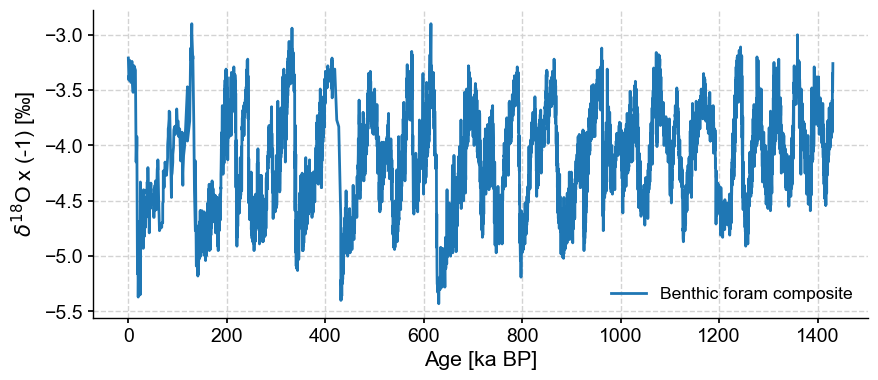

In [14]:
tsb = pyleo.Series(time=dsb.data['Age'], value=dsb.data['Foram benth δ18O'],
                      time_name='Age', time_unit='ka BP', label = 'Benthic foram composite',
                      value_name='$\delta^{18}$O', value_unit=u'‰').flip()
tsb.plot()

Note: _The chronology used in this paper is a hybrid model constructed using a combination of age–depth points from MD01-2444 and U1385. The age model is accurate to a precession cycle (∼ 23 kyr) but cannot provide exact absolute or relative dates for millennial events. This shortcoming limits the reliability of suborbital spectral peaks and estimation of recurrence times of millennial events. Nonetheless, the relative phasing of signals recording different components of the ocean–atmosphere system can be determined stratigraphically without the need for a timescale that is accurate at suborbital resolution. This is particularly important for inferring the phase relationship between planktic and benthic δ18O, which reflects the interhemispheric leads and lags of the two polar regions._

ValueError: Axis limits cannot be NaN or Inf

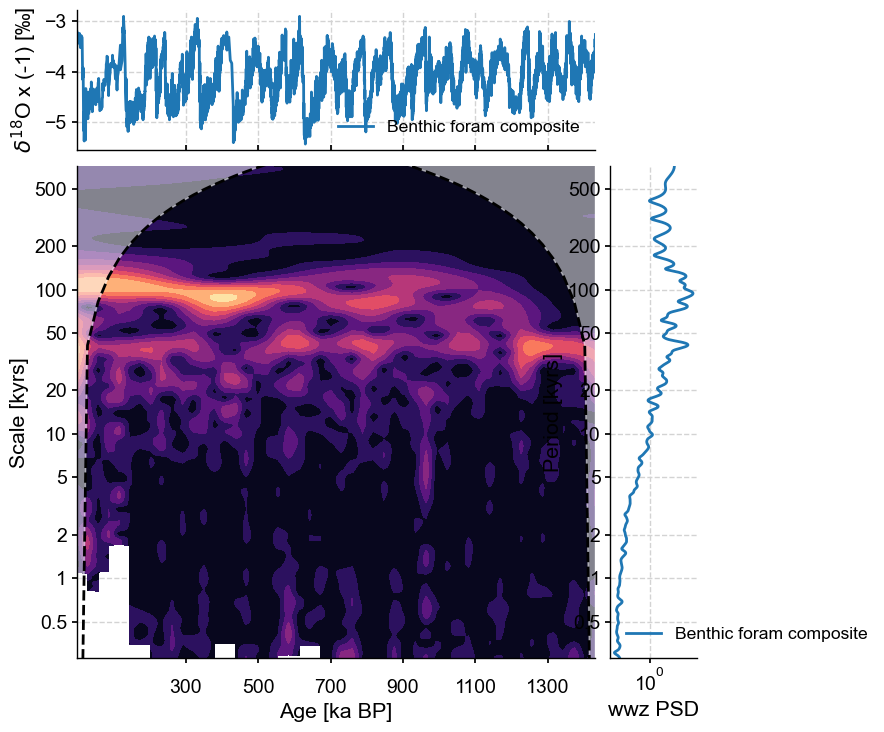

In [15]:
psd  = tsb.spectral(method='wwz')
scal = tsb.wavelet(method='wwz')
tsb.summary_plot(psd=psd,scalogram=scal)

@Jordan: do you know what is happening with the xlim here?

We see obliquity and eccentricity periods throughout the record, as expected. 

### Planktonic record

available [here](https://doi.pangaea.de/10.1594/PANGAEA.951386).

In [16]:
dsp = PanDataSet('10.1594/PANGAEA.951386')
print(dsp.title)
print(dsp.data.head())

Oxgyen and carbon isotope data for the planktonic foraminifera Globigerina bulloides at IODP Site 339-U1385
        Event  Latitude  Longitude           Sample label  Depth sed   
0  339-U1385D   37.5713   -10.1259    339-U1385D-1H-1,0-1       0.01  \
1  339-U1385D   37.5713   -10.1259  339-U1385D-1H-1,20-21       0.21   
2  339-U1385D   37.5713   -10.1259  339-U1385D-1H-1,40-41       0.41   
3  339-U1385D   37.5713   -10.1259  339-U1385D-1H-1,60-61       0.61   
4  339-U1385D   37.5713   -10.1259  339-U1385D-1H-1,80-81       0.81   

   Depth comp  Depth comp r  Depth corr cr   Age  Age_2  Age_3  Age_4   
0        0.01          0.01           0.01  0.07   0.06   0.06   0.07  \
1        0.21          0.21           0.21  1.37   1.22   1.22   1.46   
2        0.41          0.41           0.41  2.66   2.39   2.39   2.85   
3        0.61          0.61           0.61  3.86   3.55   3.55   4.24   
4        0.81          0.81           0.81  5.06   4.71   4.71   5.63   

   G. bulloides δ18O

NaNs have been detected and dropped.
Time axis values sorted in ascending order


(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot: xlabel='Age [ka BP]', ylabel='$\\delta^{18}$O x (-1) [‰]'>)

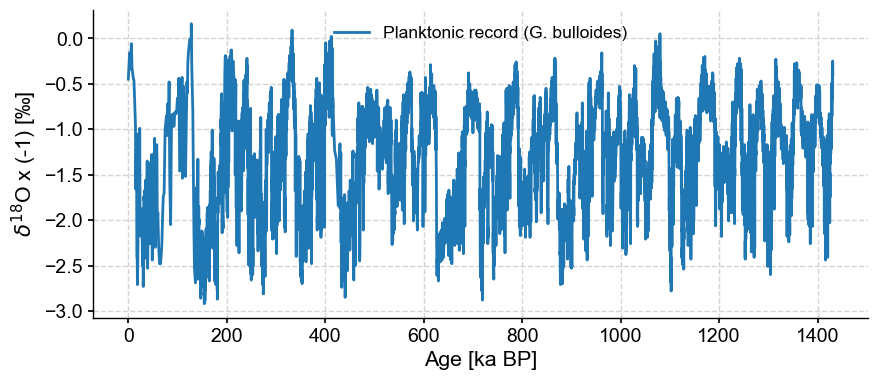

In [17]:
tsp = pyleo.Series(time=dsp.data['Age'], value=dsp.data['G. bulloides δ18O'],
                      time_name='Age', time_unit='ka BP', label = 'Planktonic record (G. bulloides)',
                      value_name='$\delta^{18}$O', value_unit=u'‰').flip()
tsp.plot()

(<Figure size 640x480 with 3 Axes>,
 {0: <Axes: ylabel='$\\delta^{18}$O x (-1) [‰]'>,
  1: <Axes: ylabel='$\\delta^{18}$O x (-1) [‰]'>,
  2: <Axes: xlabel='Age [ka BP]'>})

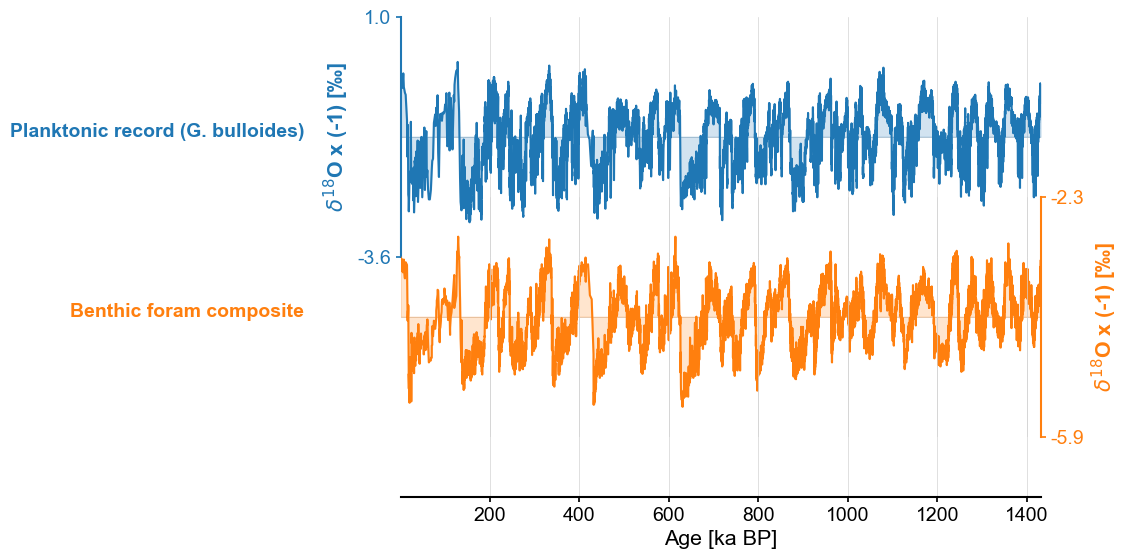

In [18]:
ms = tsp & tsb
ms.stackplot()

DescribeResult(nobs=8100, minmax=(0.0, 3.660000000000025), mean=0.1766456790123457, variance=0.035434666390760095, skewness=8.636534814144614, kurtosis=110.7583996695836)

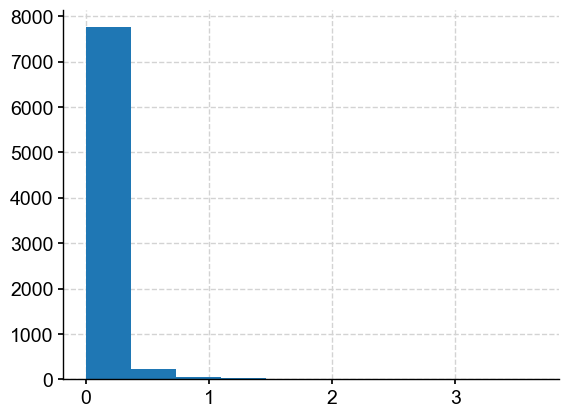

In [25]:
res, stats , sign =  pyleo.utils.tsbase.resolution(tsp.time)
import matplotlib.pyplot as plt
plt.hist(res)
stats

The data are unenvely spaced, so we need to use WWZ to analyze it.

In [20]:
coh = tsp.wavelet_coherence(tsb,method='wwz')

In [26]:
coh_sig = coh.signif_test(number=100)

Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis v

Performing wavelet coherence on surrogate pairs: 100%|██████████| 100/100 [33:52<00:00, 20.33s/it]


(<Figure size 900x1200 with 6 Axes>,
 {'ts1': <AxesSubplot: ylabel='$\\delta^{18}$O x (-1) [‰]'>,
  'ts2': <AxesSubplot: xlabel='Age [ka BP]', ylabel='$\\delta^{18}$O x (-1) [‰]'>,
  'wtc': <AxesSubplot: ylabel='Scale [kyrs]'>,
  'xwt': <AxesSubplot: xlabel='Age [ka BP]', ylabel='Scale [kyrs]'>})

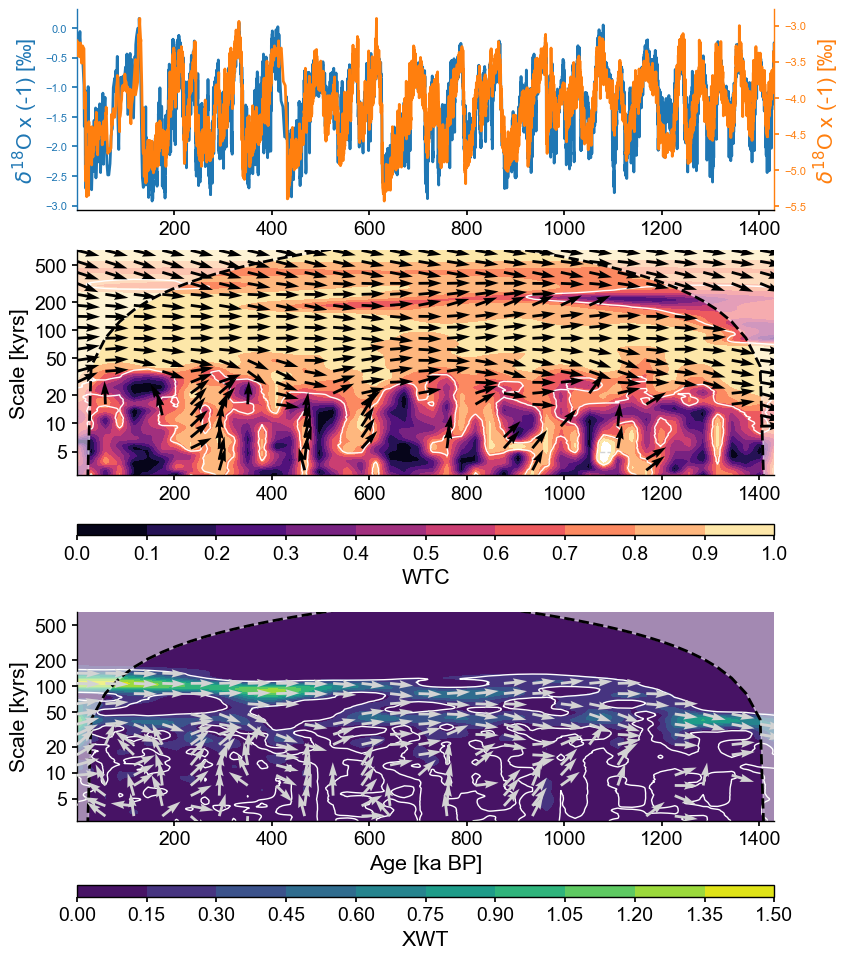

In [27]:
coh_sig.dashboard()

Huzzah! Very coherent signals at orbital scales, but phase quadrature can be observed at shorter scales

## Illustrating some key conclusions with pyleoclim tools

Hodell et al (2023) state : _"The [...] record suggests that bipolar asymmetry was a robust feature of interhemispheric glacial climate variations for at least the past 1.5 Ma despite chang- ing glacial boundary conditions. A strong correlation exists between millennial increases in planktic δ18O (cooling) and decreases in benthic δ13C, indicating that millennial varia- tions in North Atlantic surface temperature are mirrored by changes in deep-water circulation and remineralization of carbon in the abyssal ocean. We find strong evidence that climate variability on millennial and orbital scales is coupled across different timescales and interacts in both directions, which may be important for linking internal climate dynamics and external astronomical forcing. "_

This can be tested in a variety of ways:
- pyEDM
- wavelet coherence (with carbon isotopes)

## Comparison to insolation

[climlab](https://climlab.readthedocs.io/en/latest/index.html) by Brian Rose does many great things. One of them is to compute insolation curves. First, we need to figure out which insolation to use. THe paper doesn't say...  

In [ ]:
from climlab import constants as const
from climlab.solar.orbital import OrbitalTable
from climlab.solar.insolation import daily_insolation
import numpy as np

kyears = np.linspace(-400, 0, 1001 ) # specify time interval and units
orb = OrbitalTable.interp(kyear=kyears) # subset of orbital parameters for specified time
days = np.linspace(0, const.days_per_year, 365)

Qsb = daily_insolation(lat_sb, days, orb) # generate insolation  at Sanbao latitude
Qsb_jja = np.mean(Qsb[:,151:243], axis=1)  # Julian days 152-243 are JJA